In [27]:
from pixell import utils, enmap, bunch, reproject, colors, coordinates

import numpy as np
import pandas as pd

import map_utils as mu
from optical_loading import pwv_interp, keys_from_wafer, bandpass_interp, get_bandwidth
from mars_temps import T_b

from sotodlib import core
import sotodlib.io.metadata as io_meta

from astropy import units as u
from astropy import constants as consts
from astropy.convolution import convolve, Gaussian2DKernel

import matplotlib.pyplot as plt

import datetime as dt
import dill as pk
import os
import h5py
import yaml
from glob import glob
import copy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
with open("mars_saturn.pk", "rb") as f:
    rad_dict = pk.load(f)

In [32]:
rad_dict["rad_sat"].keys()

dict_keys(['uv31', 'mv28', 'mv49', 'mv21', 'mv13', 'mv14', 'mv20', 'mv26', 'uv46', 'uv47', 'mv24', 'mv32', 'mv11', 'mv34', 'uv39', 'mv25', 'uv42', 'uv38'])

/tmp/ipykernel_192549/1798872642.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))


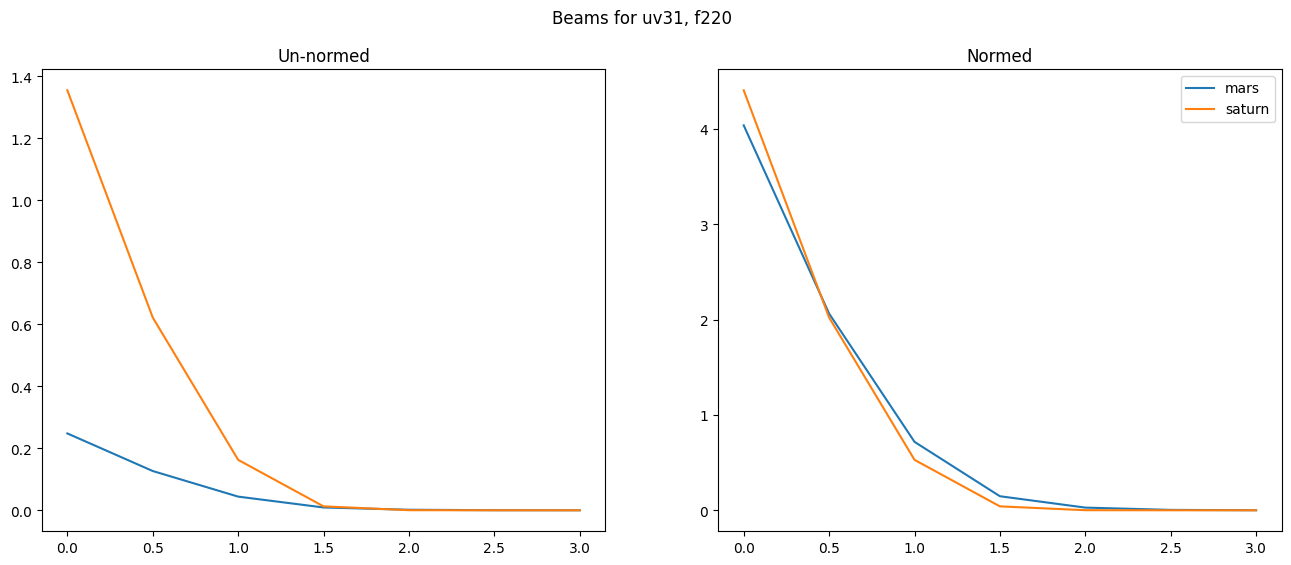

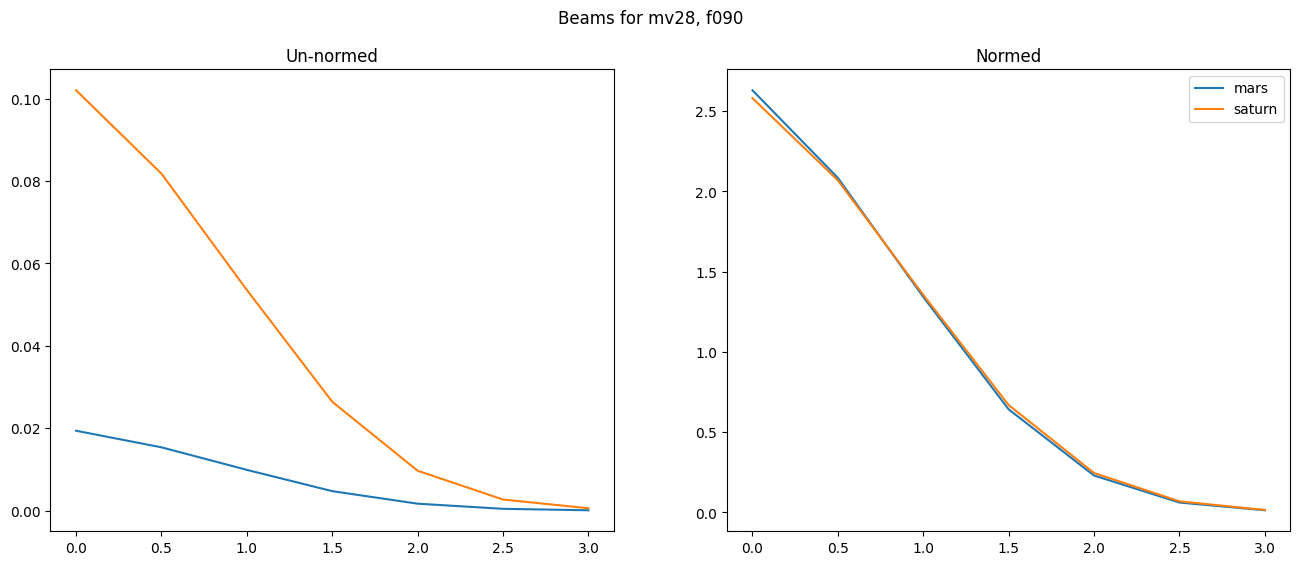

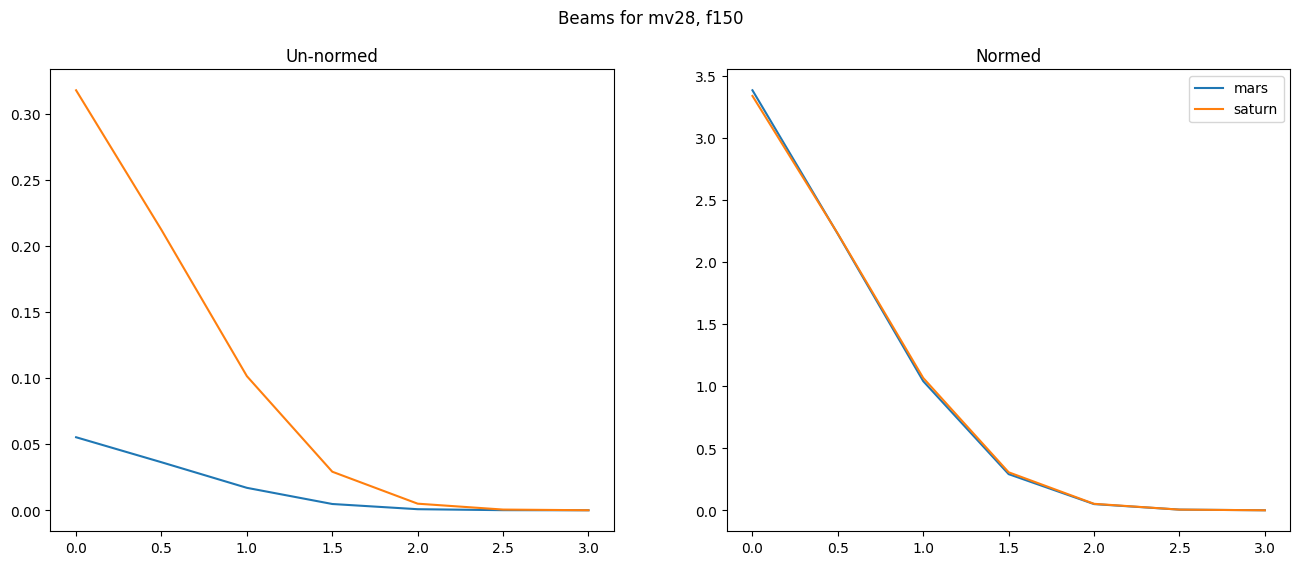

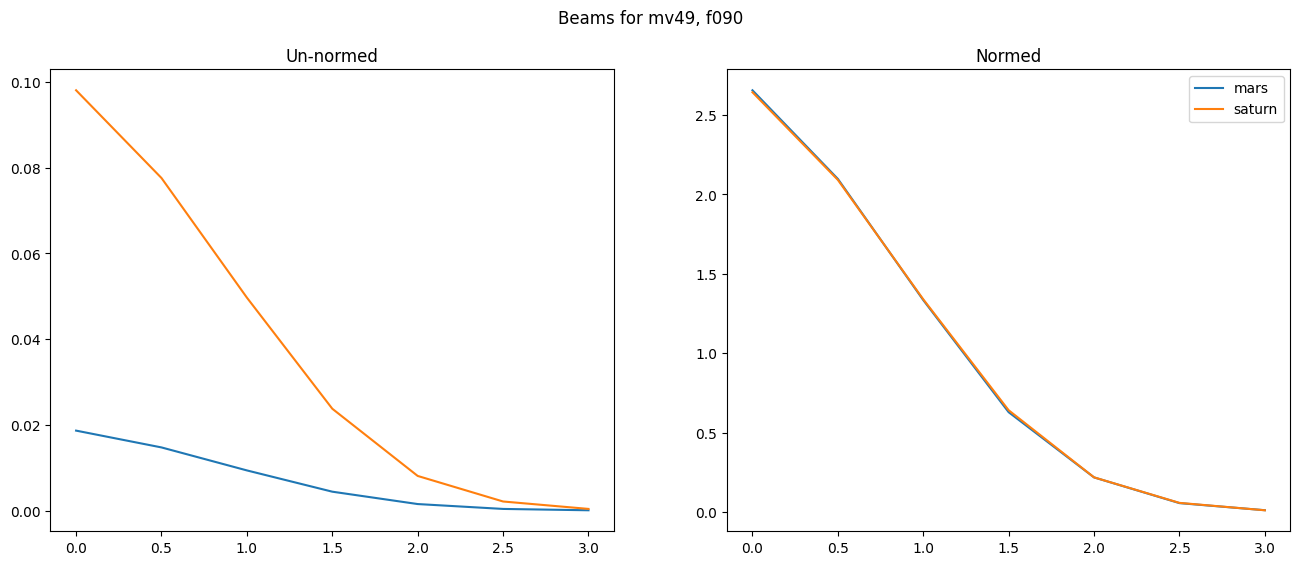

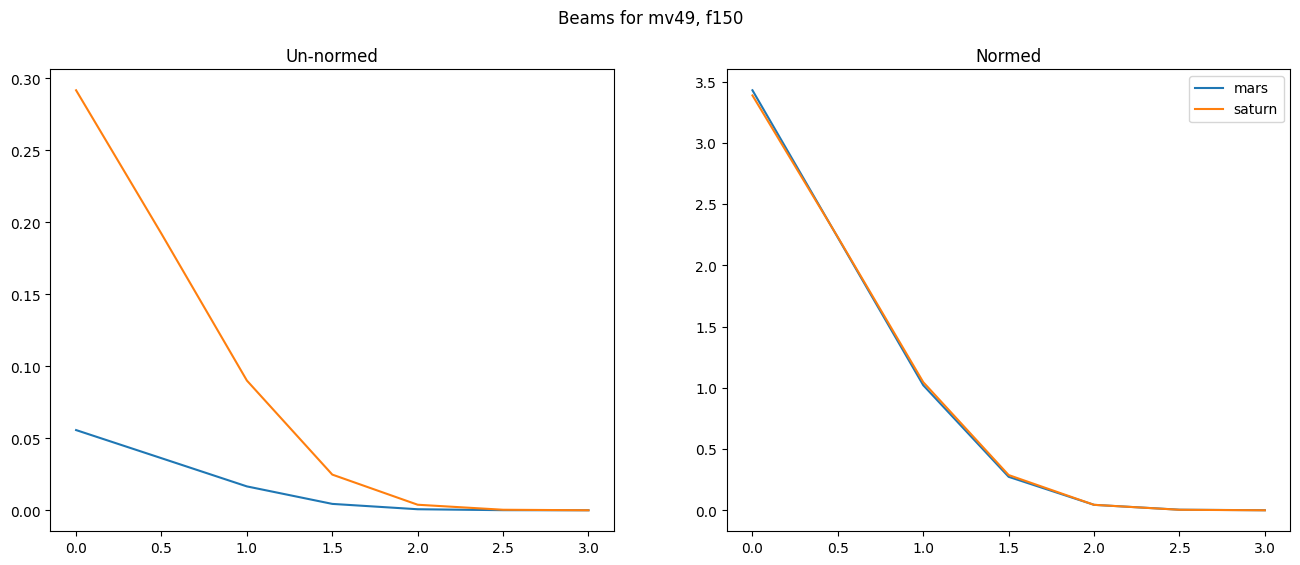

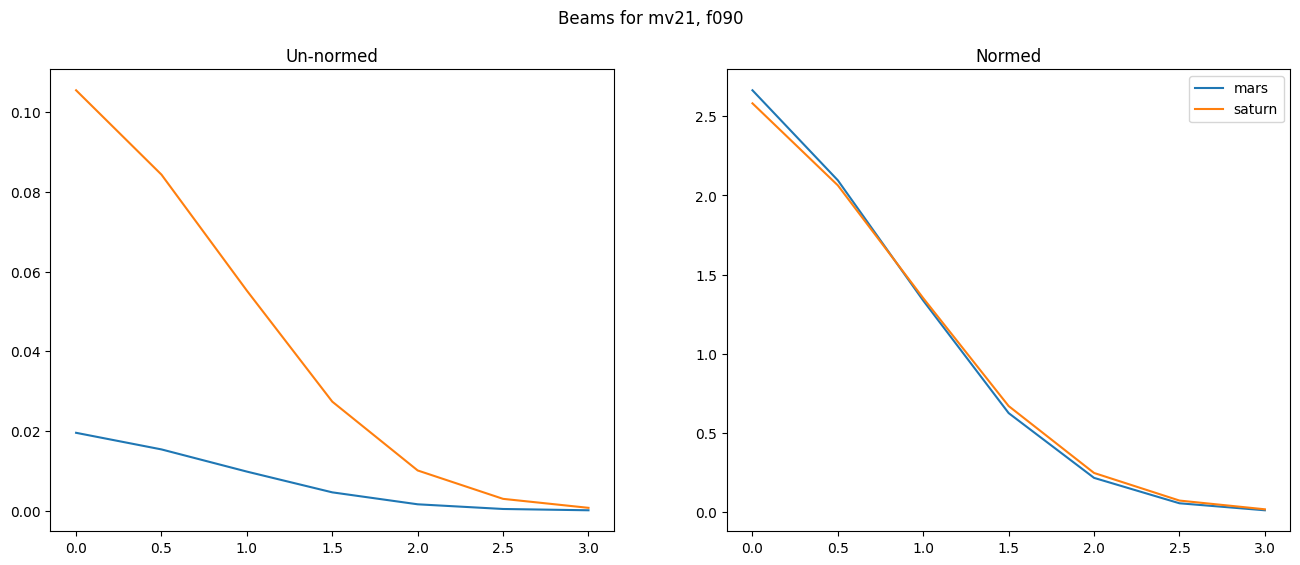

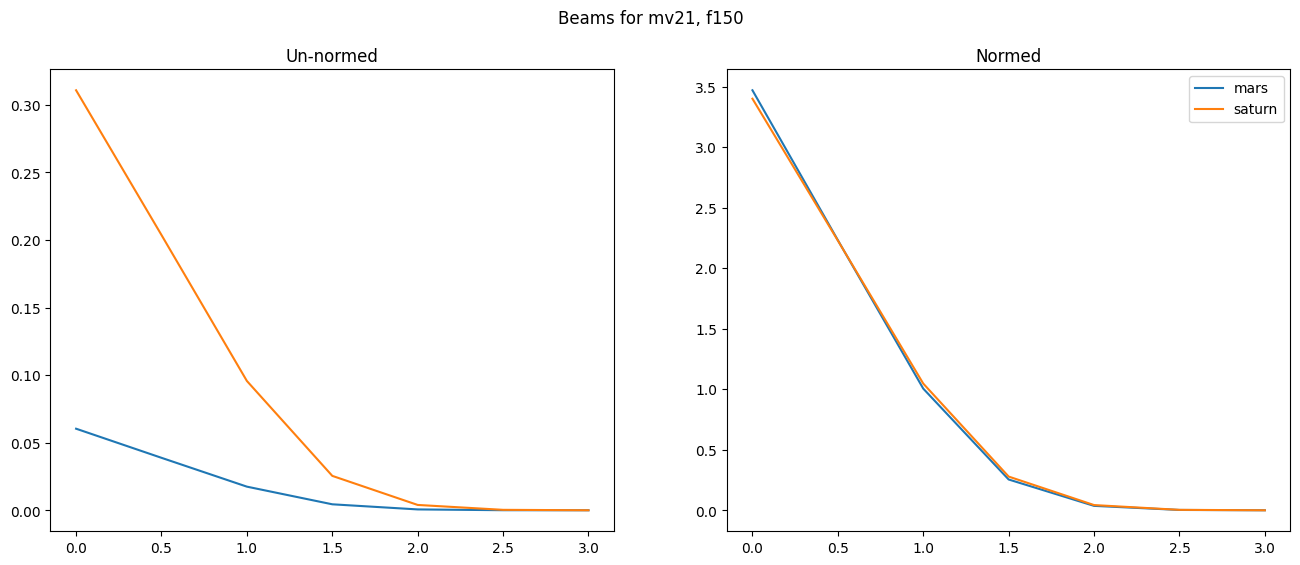

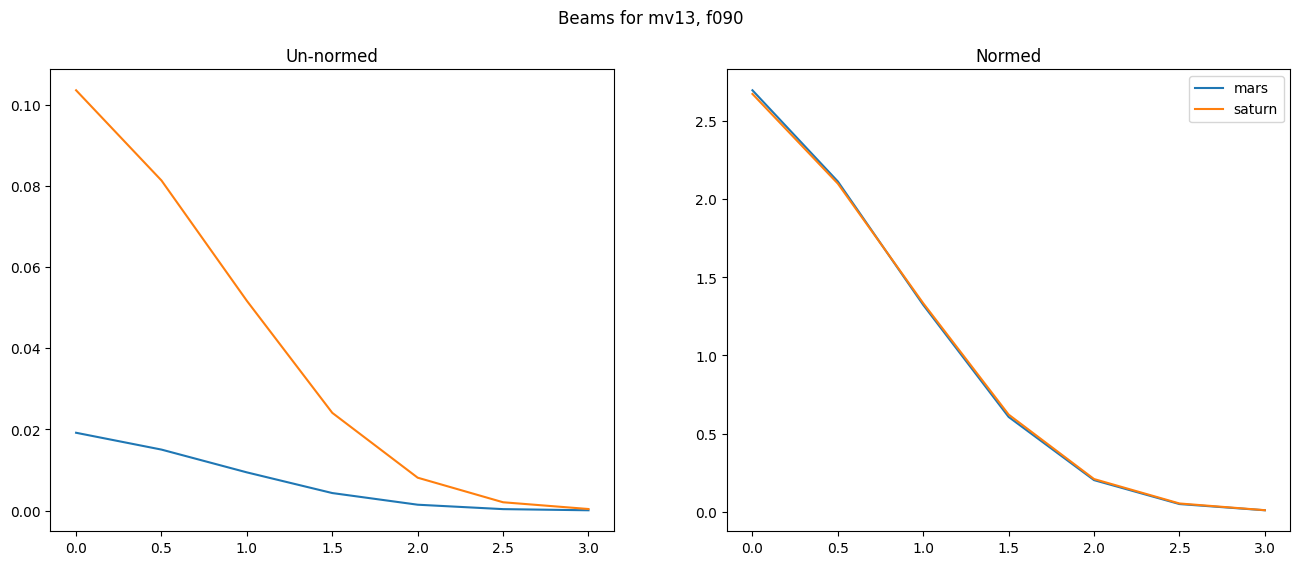

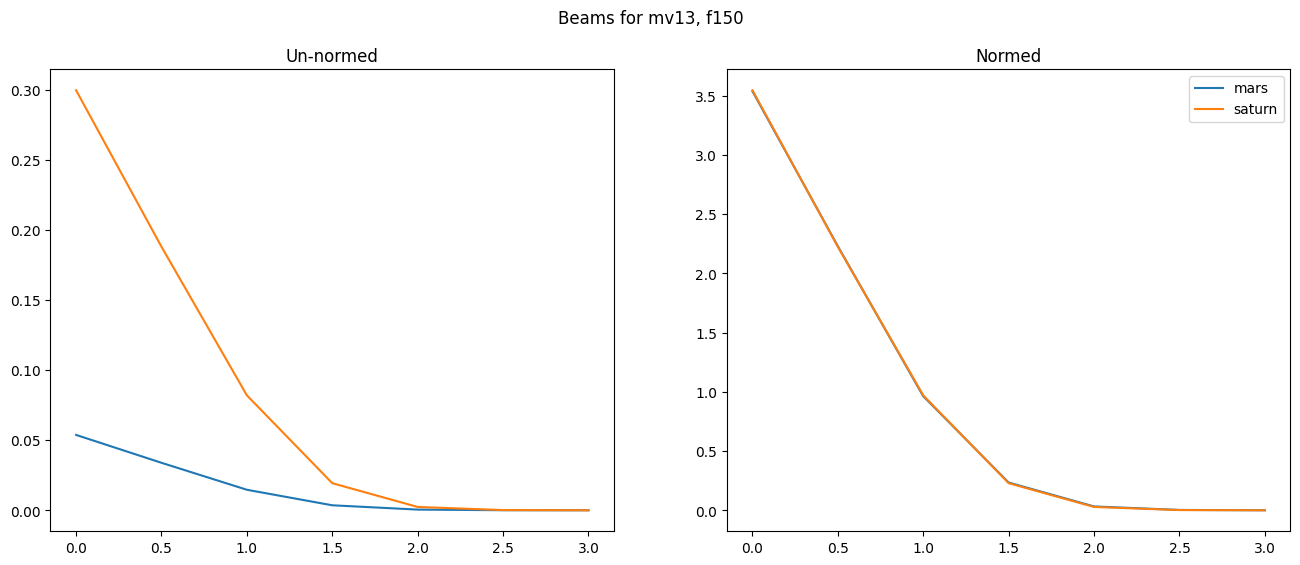

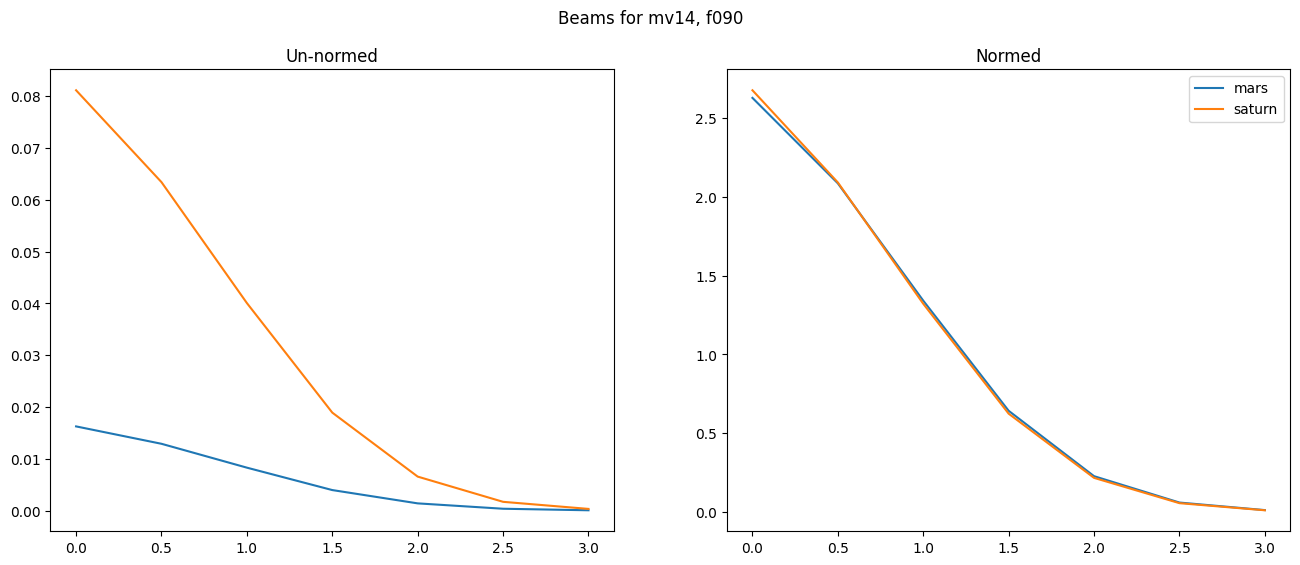

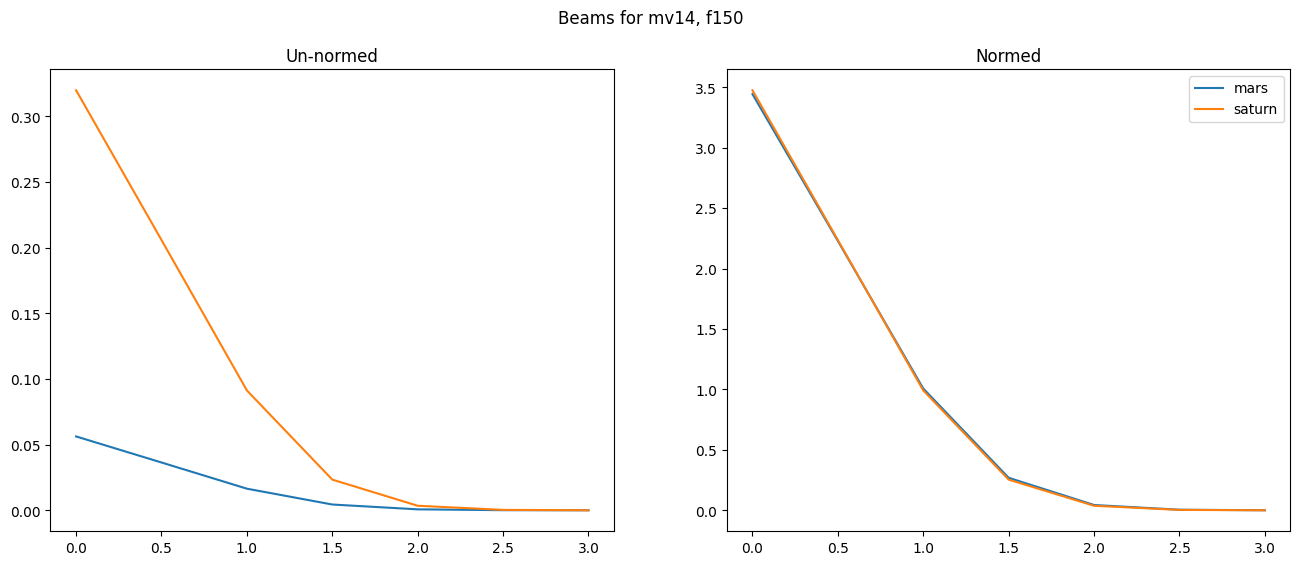

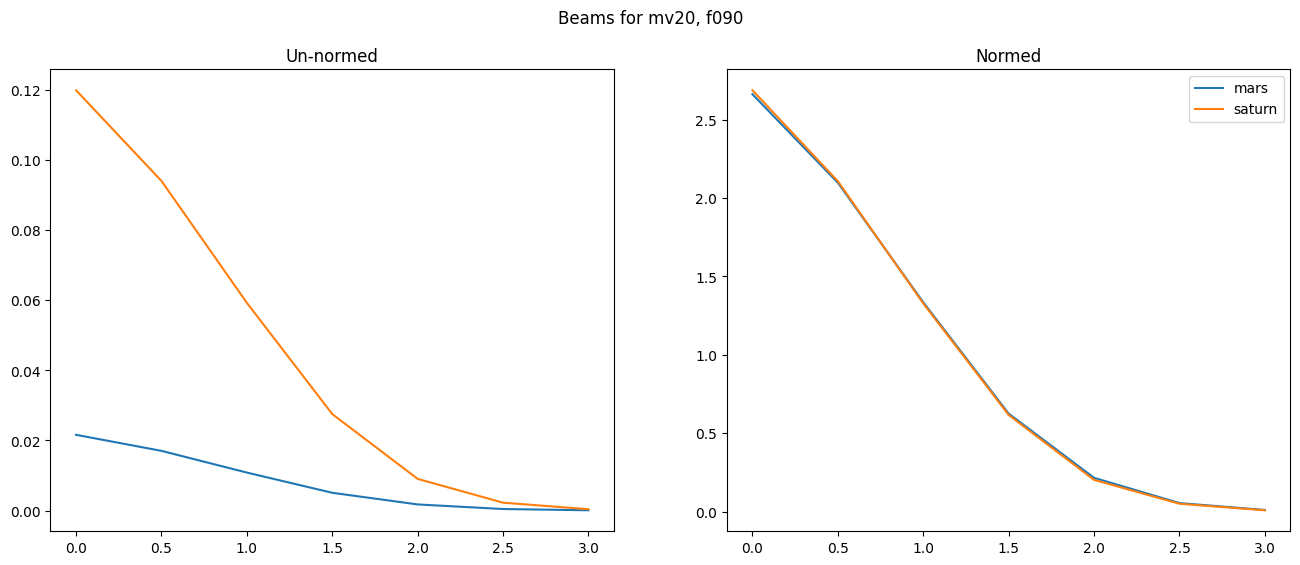

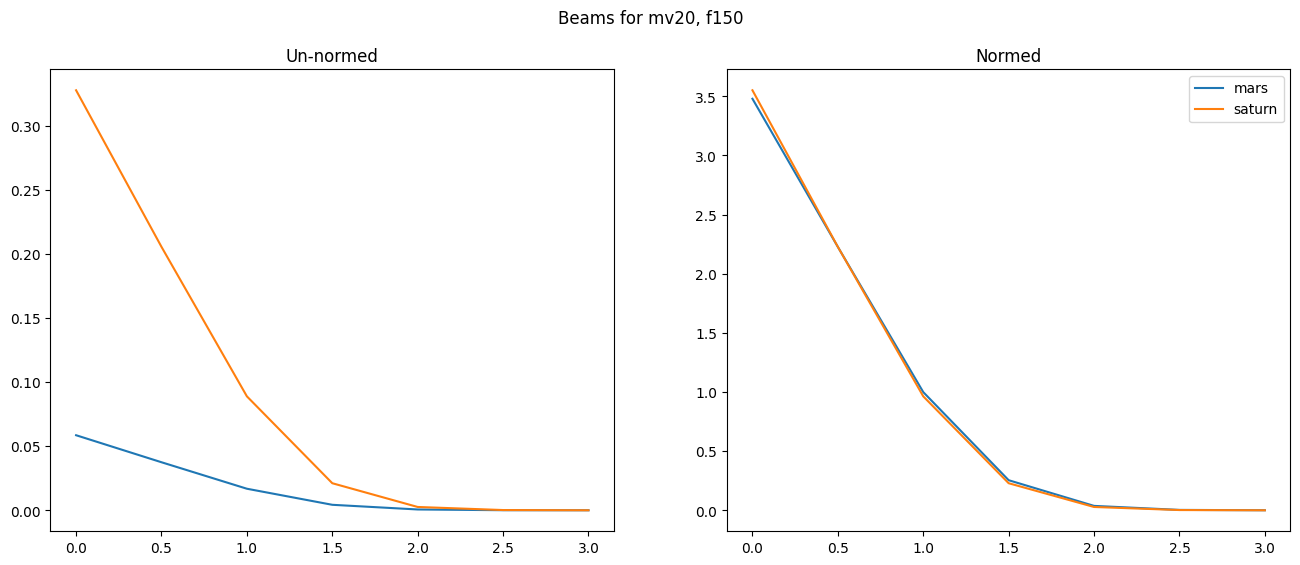

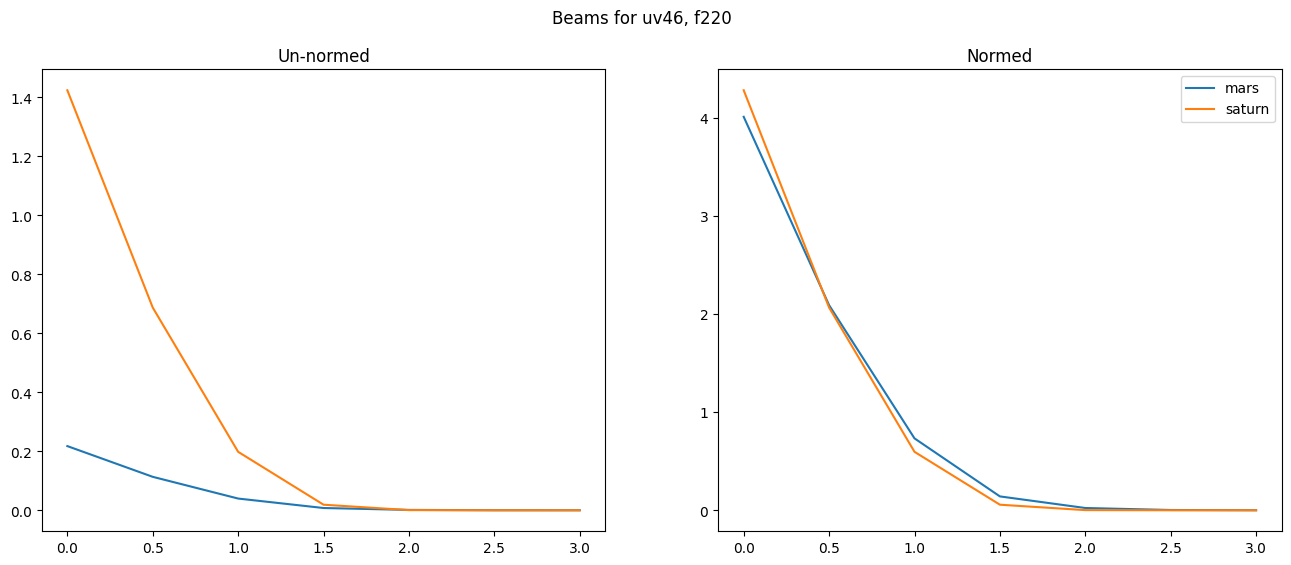

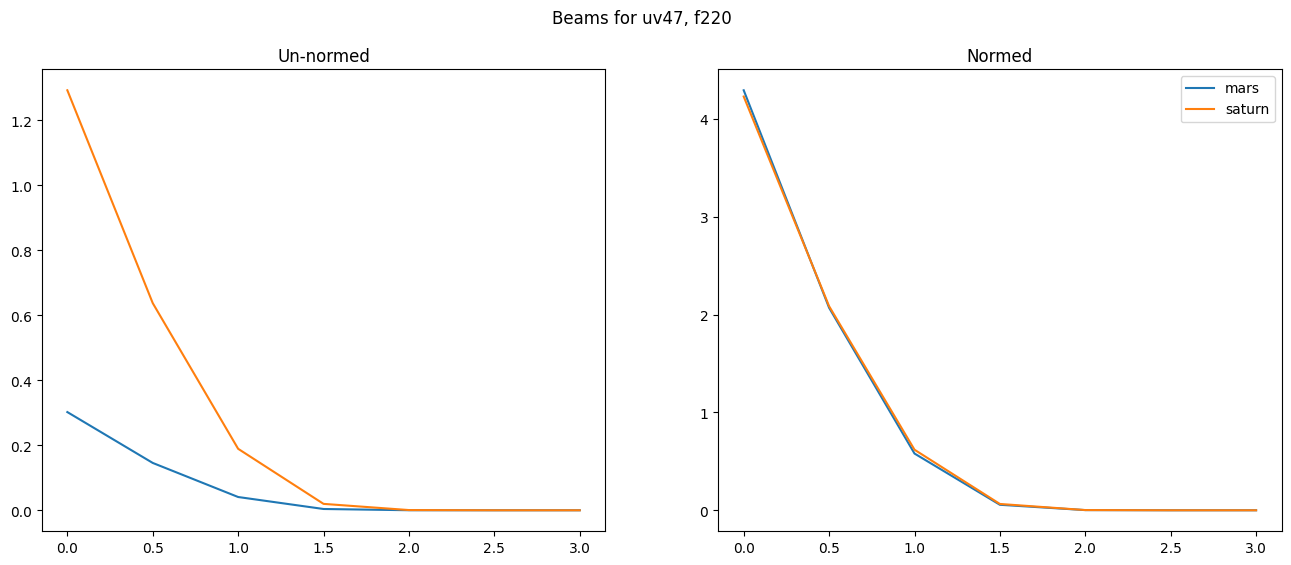

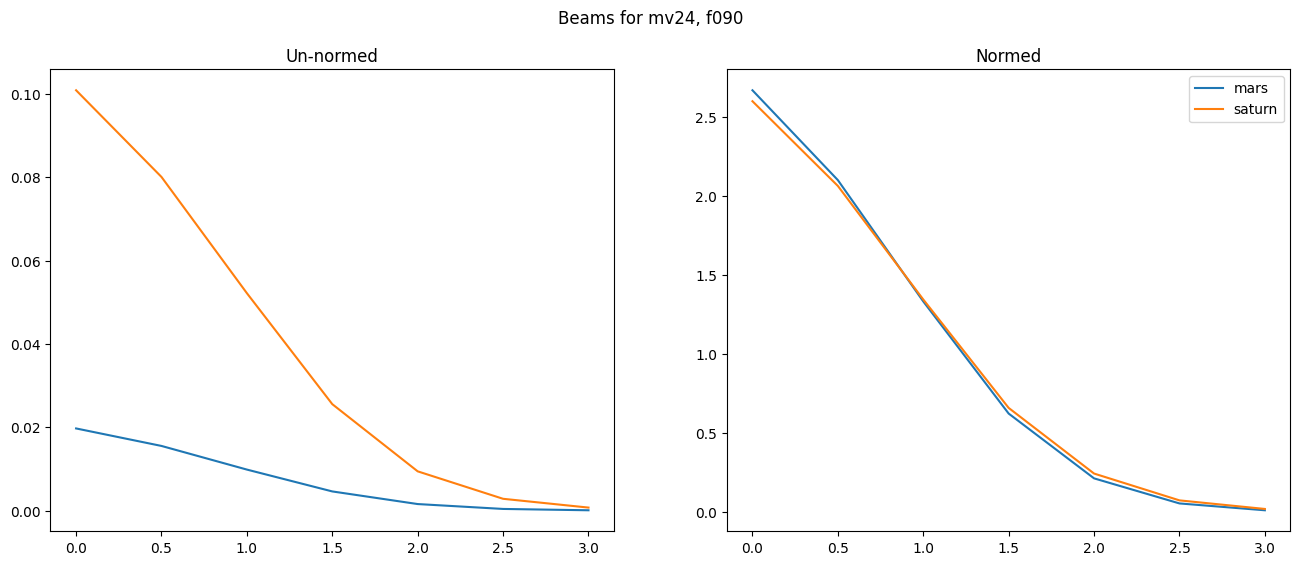

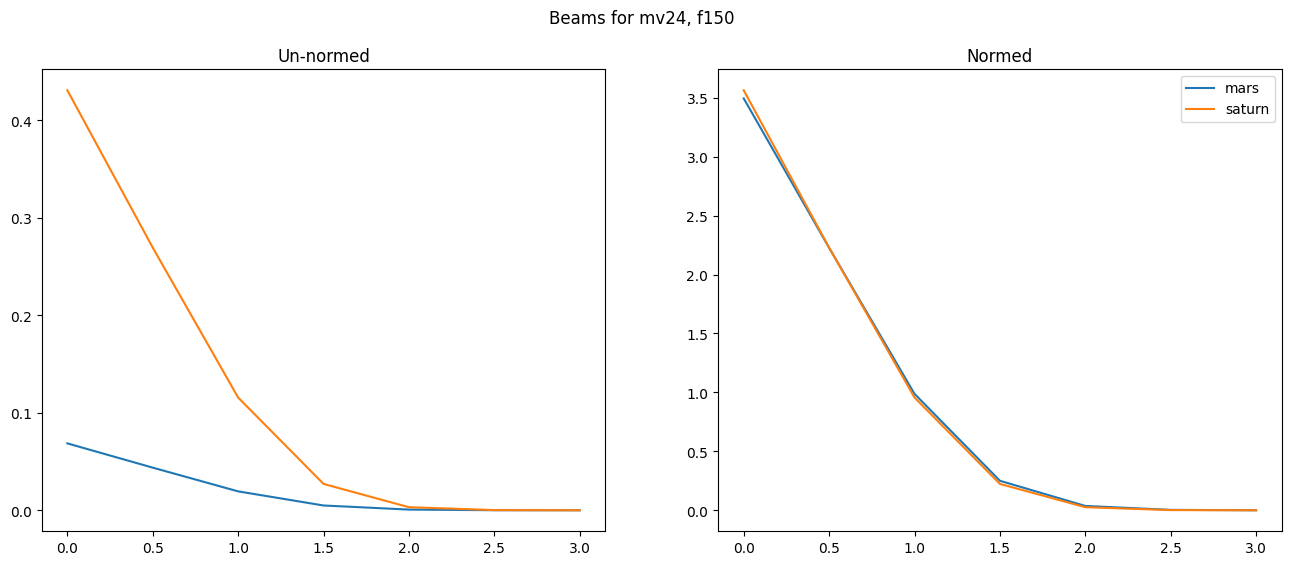

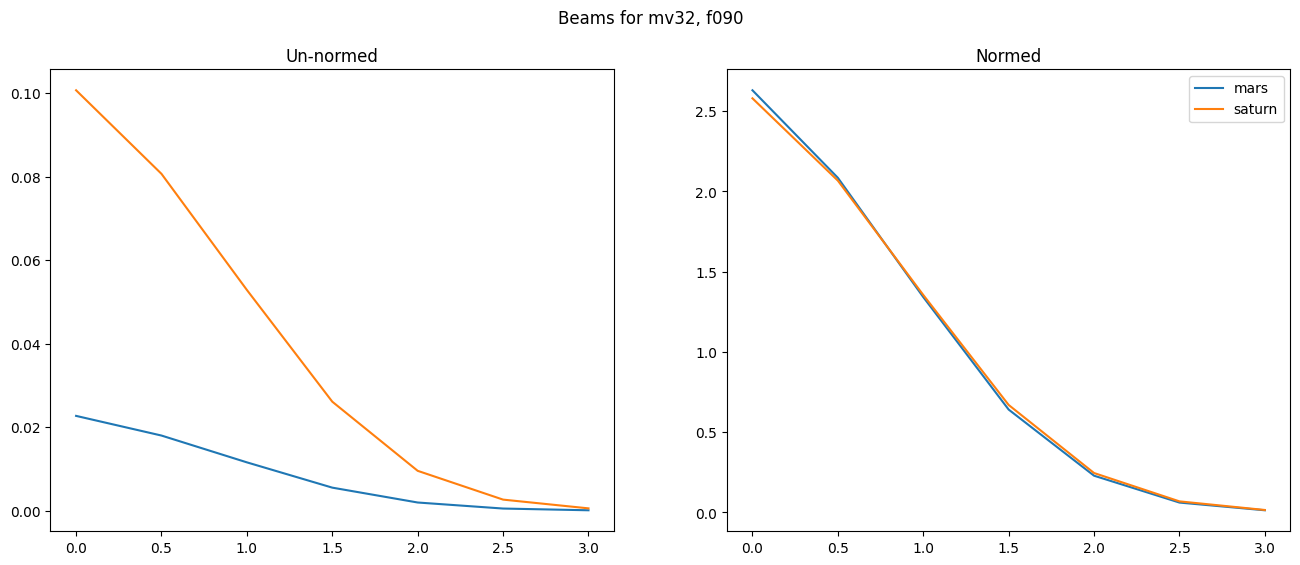

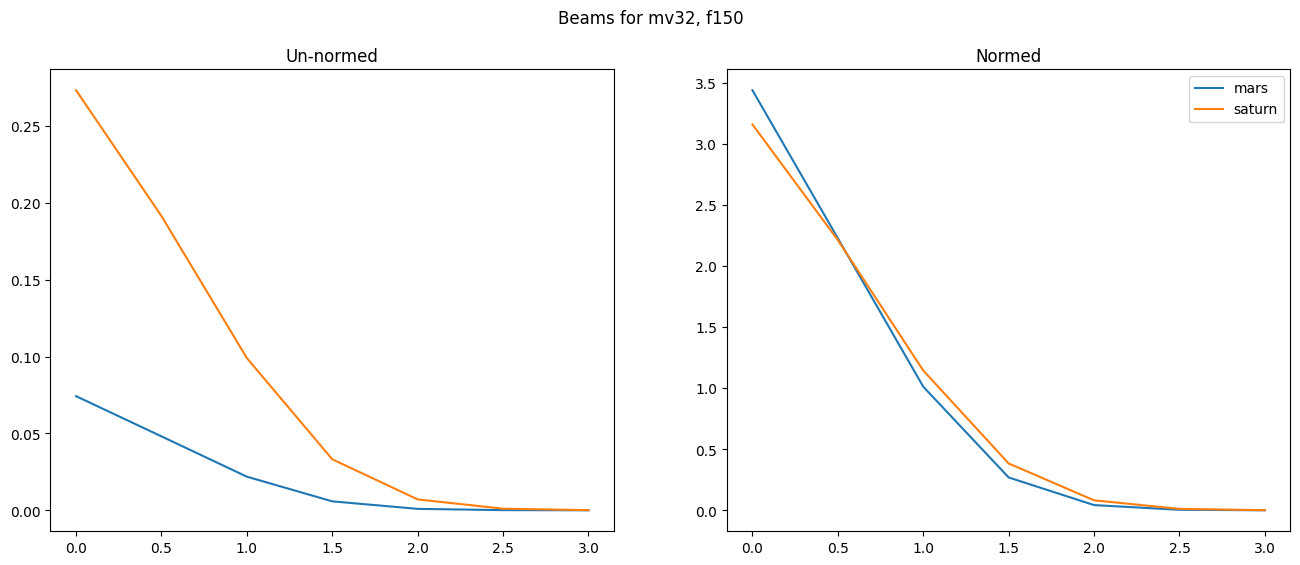

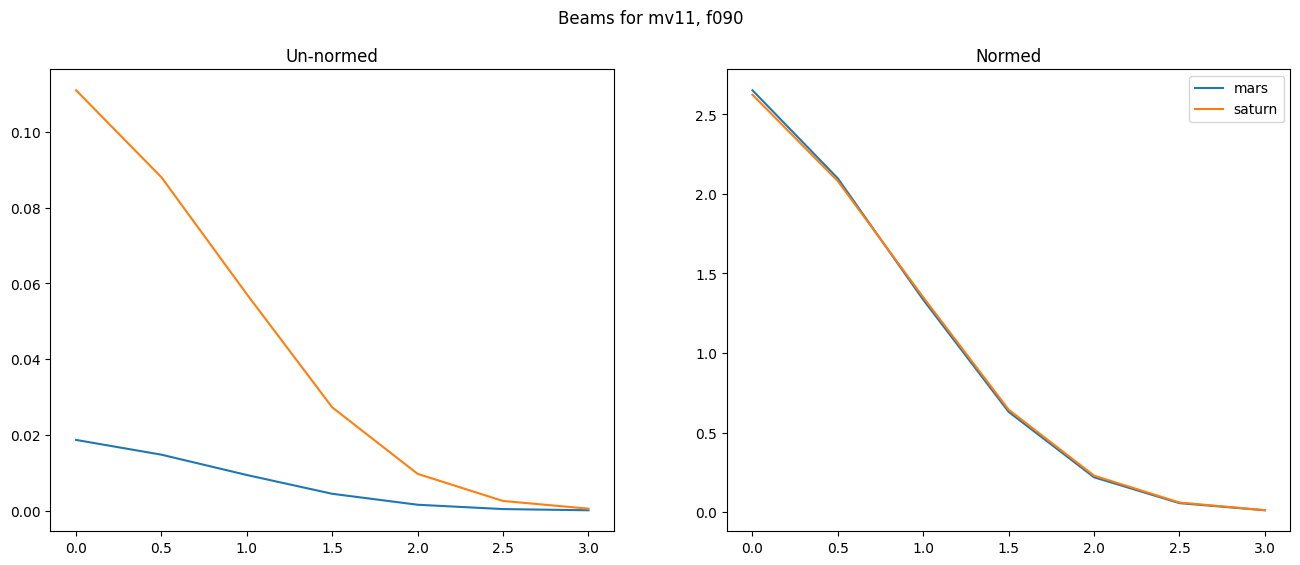

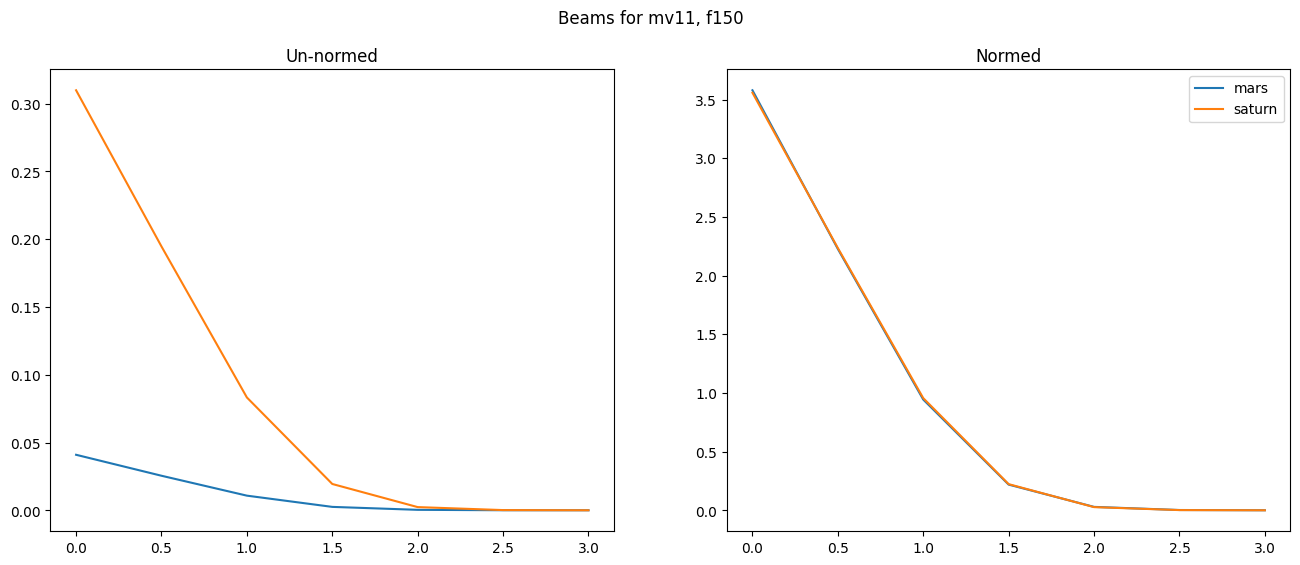

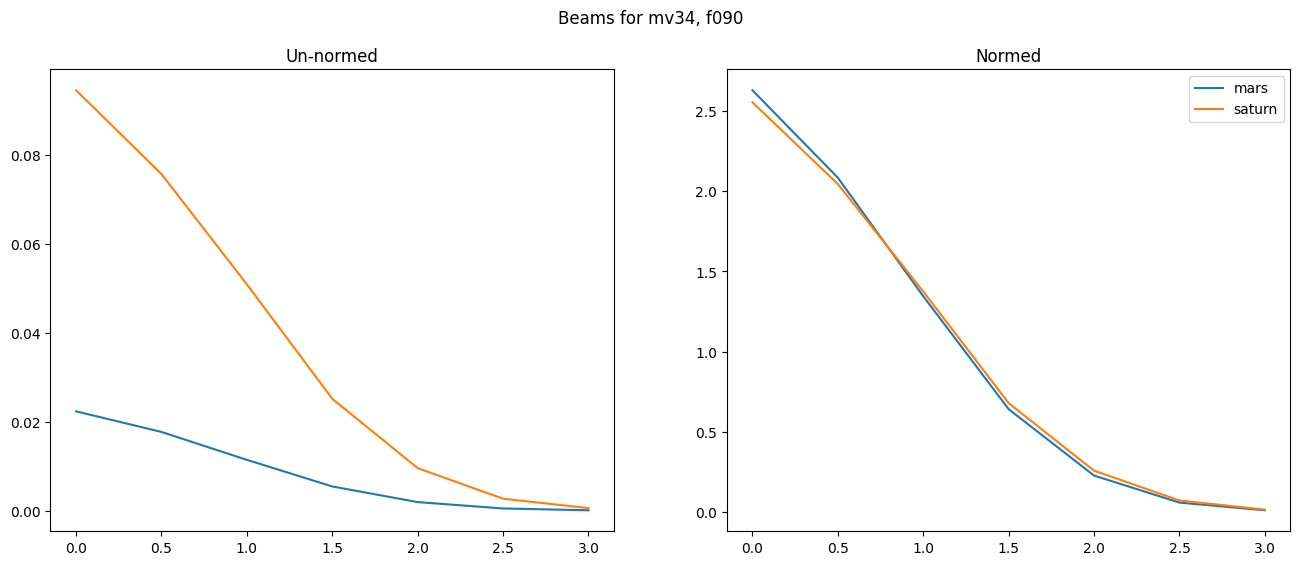

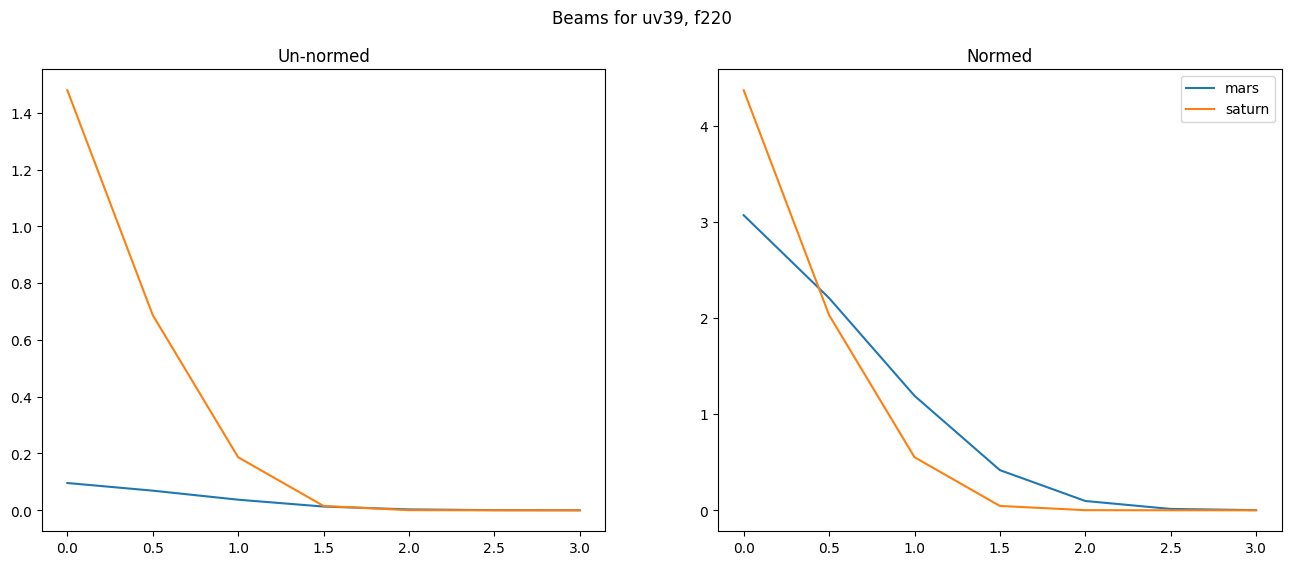

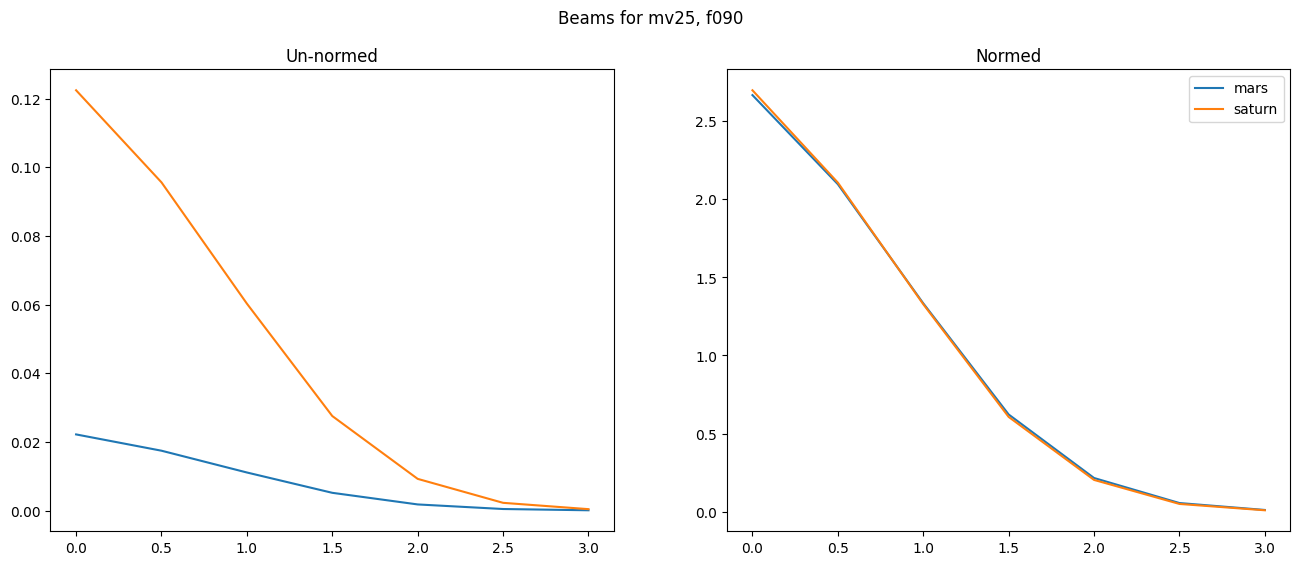

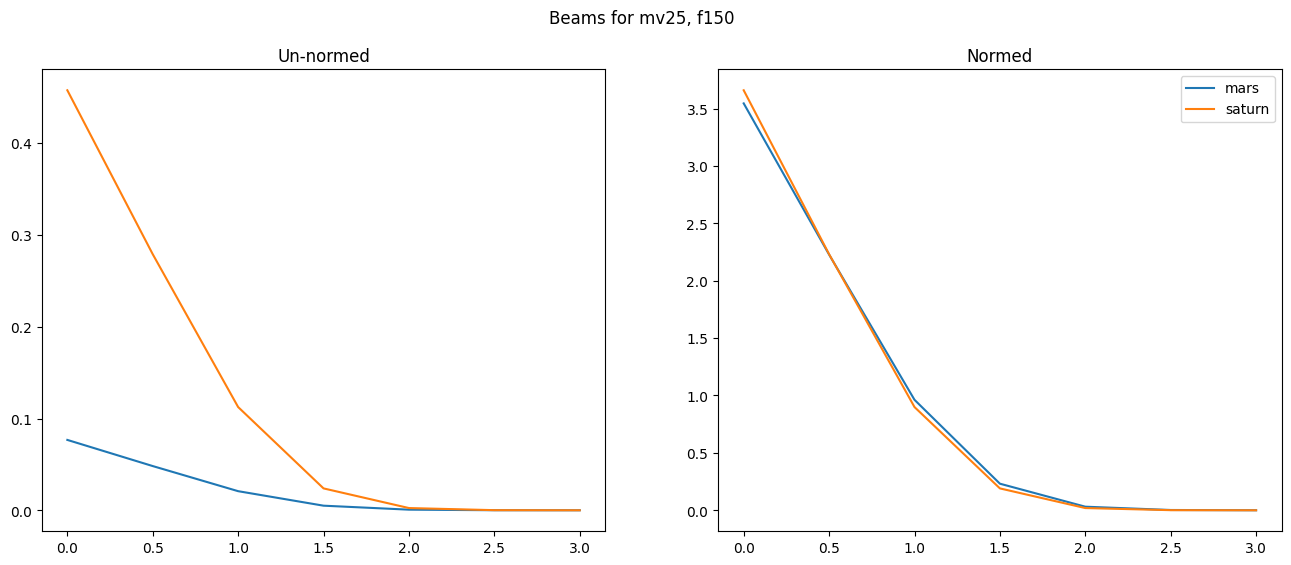

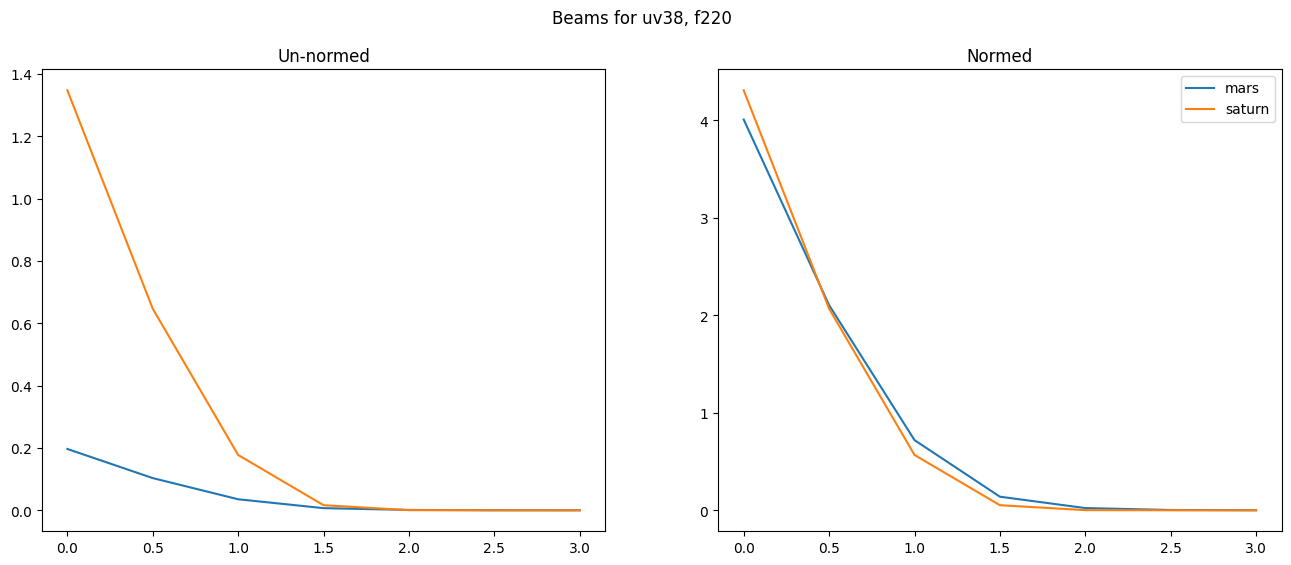

In [33]:
for array in rad_dict["rad_sat"].keys():
    for freq in rad_dict["rad_sat"][array].keys():
        if len(rad_dict["rad_sat"][array][freq])==0 or len(rad_dict["rad_mars"][array][freq])==0: continue

        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle("Beams for {}, {}".format(array,freq))
        ax[0].plot(rad_dict["rad_mars"][array][freq][0], np.mean(rad_dict["fit_mars"][array][freq], axis=0), label="mars")#/np.amax(average_profile_mars))
        ax[0].plot(rad_dict["rad_sat"][array][freq][0], np.mean(rad_dict["fit_sat"][array][freq], axis=0),  label="saturn")#/np.amax(average_profile_saturn))
        ax[0].set_title("Un-normed")
        #plt.legend()
        ax[1].plot(rad_dict["rad_mars"][array][freq][0], np.mean(rad_dict["fit_mars"][array][freq], axis=0)/np.amax(np.mean(rad_dict["fit_mars"][array][freq])), label="mars")
        ax[1].plot(rad_dict["rad_sat"][array][freq][0], np.mean(rad_dict["fit_sat"][array][freq], axis=0)/np.amax(np.mean(rad_dict["fit_sat"][array][freq])),  label="saturn")
        ax[1].set_title("Normed")
        plt.legend()
        plt.savefig("./plts/mars_saturn/mars_saturn_{}_{}.png".format(array, freq), dpi=600)
        plt.savefig("./plts/mars_saturn/mars_saturn_{}_{}.pdf".format(array, freq), dpi=600)

In [34]:
for array in rad_dict["rad_sat"].keys():
    for freq in rad_dict["rad_sat"][array].keys():
        if len(rad_dict["rad_sat"][array][freq])==0 or len(rad_dict["rad_mars"][array][freq])==0:
            print(array, freq, len(rad_dict["rad_sat"][array][freq]), len(rad_dict["rad_mars"][array][freq]))

uv31 f280 6 0
mv26 f090 0 23
mv26 f150 0 23
uv46 f280 6 0
uv47 f280 6 0
mv34 f150 0 18
uv39 f280 6 0
uv42 f220 0 3
uv42 f280 0 0
uv38 f280 6 0
